# Mapping migration

Introduction to vector data operations

## STEP 0: Set up

To get started on this notebook, you’ll need to restore any variables
from previous notebooks to your workspace. To save time and memory, make
sure to specify which variables you want to load.

In [1]:
# Load occurrence_df, ecoregions_gdf, and gbif_gdf
%store -r occurrence_df ecoregions_gdf gbif_gdf

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Import packages</div></div><div class="callout-body-container callout-body"><p>In the imports cell, we’ve included some packages that you will need.
Add imports for packages that will help you:</p>
<ol type="1">
<li>Make interactive maps with vector data</li>
<li>Access pre-defined month names</li>
<li>Define Coordinate Reference Systems (CRSs)</li>
</ol></div></div>

In [2]:
# Import calendar to get month names
import calendar

# Import the below libraries for dynamic mapping
import cartopy.crs as ccrs
import panel as pn
import pandas as pd
import geopandas as gpd
import hvplot.pandas
import holoviews as hv

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
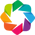

In [3]:
# Install "jupyter_bokeh" by inputting "conda install -c bokeh jupyter_bokeh" into the terminal

# Initialize the appropriate extensions
hv.extension('bokeh')  
pn.extension()  

### Create a simplified `GeoDataFrame` for plotting

Plotting larger files can be time consuming. The code below will
streamline plotting with `hvplot` by simplifying the geometry,
projecting it to a Mercator projection that is compatible with
`geoviews`, and cropping off areas in the Arctic.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Simplify ecoregion data</div></div><div class="callout-body-container callout-body"><p>Download and save ecoregion boundaries from the EPA:</p>
<ol type="1">
<li>Simplify the ecoregions with <code>.simplify(.05)</code>, and save
it back to the <code>geometry</code> column.</li>
<li>Change the Coordinate Reference System (CRS) to Mercator with
<code>.to_crs(ccrs.Mercator())</code></li>
<li>Use the plotting code that is already in the cell to check that the
plotting runs quickly (less than a minute) and looks the way you want,
making sure to change <code>gdf</code> to YOUR <code>GeoDataFrame</code>
name.</li>
</ol></div></div>

In [4]:
# Simplify the ecoregions' geometry to speed up processing
ecoregions_gdf['geometry'] = ecoregions_gdf.simplify(.05, preserve_topology=False)

# Change the CRS to Mercator for mapping
ecoregions_gdf = ecoregions_gdf.to_crs(ccrs.Mercator())

# Check that the plot runs properly
ecoregions_gdf.hvplot()

:Polygons   [x,y]

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Map migration over time</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>If applicable, replace any variable names with the names you defined
previously.</li>
<li>Replace <code>column_name_used_for_ecoregion_color</code> and
<code>column_name_used_for_slider</code> with the column names you wish
to use.</li>
<li>Customize your plot with your choice of title, tile source, color
map, and size.</li>
</ol>
<div data-__quarto_custom="true" data-__quarto_custom_type="Callout"
data-__quarto_custom_context="Block" data-__quarto_custom_id="3">
<div data-__quarto_custom_scaffold="true">

</div>
<div data-__quarto_custom_scaffold="true">
<p>Your plot will probably still change months very slowly in your
Jupyter notebook, because it calculates each month’s plot as needed.
Open up the saved HTML file to see faster performance!</p>
</div>
</div></div></div>

In [5]:
occurrence_df

occurrences  norm_occurrences
ecoregion month                               
13.0      5                2          0.000816
          6                2          0.000918
          7                2          0.001760
17.0      4                2          0.000010
          5             3023          0.001701
...                      ...               ...
839.0     7              297          0.002202
          8               40          0.001006
          9               11          0.000171
845.0     9               28          0.005575
          10               9          0.014447

[309 rows x 2 columns]

In [6]:
# The indexes must match to join occurrences with the plotting GeoDataFrame

#  Rename ecoregions_gdf's "OBJECTID" to "ecoregion" to match occurrence_df
ecoregions_gdf = ecoregions_gdf.rename(columns = {'OBJECTID': 'ecoregion'})

# Set the index to "ecoregion"
ecoregions_gdf.set_index('ecoregion', inplace=True)

# Join the occurrences with the plotting GeoDataFrame
occurrence_gdf = ecoregions_gdf.join(occurrence_df)

In [7]:
occurrence_gdf

ECO_NAME  BIOME_NUM  \
ecoregion month                                                          
13.0      5      Alberta-British Columbia foothills forests        5.0   
          6      Alberta-British Columbia foothills forests        5.0   
          7      Alberta-British Columbia foothills forests        5.0   
17.0      4                     Allegheny Highlands forests        4.0   
          5                     Allegheny Highlands forests        4.0   
...                                                     ...        ...   
839.0     7                Northern Rockies conifer forests        5.0   
          8                Northern Rockies conifer forests        5.0   
          9                Northern Rockies conifer forests        5.0   
845.0     9              North Atlantic moist mixed forests        4.0   
          10             North Atlantic moist mixed forests        4.0   

                                          BIOME_NAME       REALM ECO_BIOME_  \
ecoregion month                                                               
13.0      5                Temperate Conifer Forests    Nearctic       NE05   
          6                Temperate Conifer Forests    Nearctic       NE05   
          7                Temperate Conifer Forests    Nearctic       NE05   
17.0      4      Temperate Broadleaf & Mixed Forests    Nearctic       NE04   
          5      Temperate Broadleaf & Mixed Forests    Nearctic       NE04   
...                                              ...         ...        ...   
839.0     7                Temperate Conifer Forests    Nearctic       NE05   
          8                Temperate Conifer Forests    Nearctic       NE05   
          9                Temperate Conifer Forests    Nearctic       NE05   
845.0     9      Temperate Broadleaf & Mixed Forests  Palearctic       PA04   
          10     Temperate Broadleaf & Mixed Forests  Palearctic       PA04   

                 NNH  ECO_ID  SHAPE_LENG  SHAPE_AREA  \
ecoregion month                                        
13.0      5        2     345   62.333821   17.133639   
          6        2     345   62.333821   17.133639   
          7        2     345   62.333821   17.133639   
17.0      4        2     328   24.038587    7.958751   
          5        2     328   24.038587    7.958751   
...              ...     ...         ...         ...   
839.0     7        2     361   56.924527   35.905513   
          8        2     361   56.924527   35.905513   
          9        2     361   56.924527   35.905513   
845.0     9        3     672   89.144126    5.586107   
          10       3     672   89.144126    5.586107   

                                          NNH_NAME    COLOR COLOR_BIO  \
ecoregion month                                                         
13.0      5      Nature Could Reach Half Protected  #5DAD4C   #458970   
          6      Nature Could Reach Half Protected  #5DAD4C   #458970   
          7      Nature Could Reach Half Protected  #5DAD4C   #458970   
17.0      4      Nature Could Reach Half Protected  #C8EBB1   #00734C   
          5      Nature Could Reach Half Protected  #C8EBB1   #00734C   
...                                            ...      ...       ...   
839.0     7      Nature Could Reach Half Protected  #ACC13E   #458970   
          8      Nature Could Reach Half Protected  #ACC13E   #458970   
          9      Nature Could Reach Half Protected  #ACC13E   #458970   
845.0     9                   Nature Could Recover  #378F52   #00734C   
          10                  Nature Could Recover  #378F52   #00734C   

                COLOR_NNH    LICENSE  \
ecoregion month                        
13.0      5       #7BC141  CC-BY 4.0   
          6       #7BC141  CC-BY 4.0   
          7       #7BC141  CC-BY 4.0   
17.0      4       #7BC141  CC-BY 4.0   
          5       #7BC141  CC-BY 4.0   
...                   ...        ...   
839.0     7       #7BC141  CC-BY 4.0   
          8       #7B

In [8]:
type(occurrence_gdf)

geopandas.geodataframe.GeoDataFrame

In [11]:
# Reset the month index without adding the old index
occurrence_gdf = occurrence_gdf.reset_index()

# Define the parameters of the slider widget
month_widget = pn.widgets.DiscreteSlider(
    name='Month',
    # Give the month names
    options={calendar.month_abbr[m]: m for m in range(1, 13)},
    value=1
)

# Obtain the plot bounds so they do not change with the slider
xmin, ymin, xmax, ymax = occurrence_gdf.total_bounds

# Plot occurrence by ecoregion and month
# Group by month
migration_plot = (
    occurrence_gdf
    .hvplot(
        groupby='month',
        # Use background tiles
        geo=True,
        crs=ccrs.Mercator(), 
        color='norm_occurrences',
        cmap='plasma',
        tiles='CartoLight',
        title="Veery Thrush Migration",
        xlim=(xmin, xmax), ylim=(ymin, ymax),
        frame_height=600,
        frame_width=400,
        # Set the widget to be defined by month as a slider
        # Relocate the widget to the bottom
        widget_location='bottom',
        widgets = {'month': month_widget}
    )
)

# Show the plot
migration_plot

AttributeError: 'function' object has no attribute 'reset_index'

Note: I am having issues with getting the plot to display; the current "migration.html" is a plot that displays the data, but the original workflow I worked on got overwritten by accident.

Headline: Beginning in September, the veery thrush migrates from the United States to South America to overwinter.

The veery (*Catharus fuscescens*) is a medium-sized thrush that breeds in North American forests (BirdLife International, 2018) and overwinters in South America (Heckscher et al., 2011). Documented migration patterns correlate with those seen on the plot: veery populations typically begin migrating around September, though the date of clutch completion—most commonly in May or June—is the primary predictor of their arrival time (Heckscher, 2018). Research indicates this species spends eight months outside of North America each year (Heckscher et al., 2011), but the plot's data suggests some populations spend more time in North America; this discrepancy is attributable to variance in clutch completion times.

References
BirdLife International. (2018). Catharus fuscescens. *The IUCN Red List of Threatened Species*, 1-7.http://dx.doi.org/10.2305/IUCN.UK.2018-2.RLTS.T22708655A131949838.en
Heckscher, C. M. (2018). A Nearctic-Neotropical Migratory Songbird’s Nesting Phenology and Clutch Size are Predictors of Accumulated Cyclone Energy. *Scientific Reports*, *8*(1), 1–6. https://doi.org/10.1038/s41598-018-28302-3
Heckscher, C. M., Taylor, S. M., Fox, J. W., & Afanasyev, V. (2011). Veery (Catharus fuscescens) Wintering Locations, Migratory Connectivity, and a Revision of its Winter Range Using Geolocator Technology. *The Auk*, *128*(3), 531–542. https://doi.org/10.1525/auk.2011.10280

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-extra"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Looking for an Extra Challenge?: Fix the month labels</div></div><div class="callout-body-container callout-body"><p>Notice that the <code>month</code> slider displays numbers instead of
the month name. Use <code>pn.widgets.DiscreteSlider()</code> with the
<code>options=</code> parameter set to give the months names. You might
want to try asking ChatGPT how to do this, or look at the documentation
for <code>pn.widgets.DiscreteSlider()</code>. This is pretty tricky!</p></div></div>